<a href="https://colab.research.google.com/github/ananyaa06/Create-A-Thon-Fantastic-4/blob/main/Individual_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This model uses a dataset collected by sending out the following [survey](https://forms.gle/S7C6L9XAB4tRmk8r7) to people in homeless shelters. The survey questioned people on the below parameters, with the "REQUIRED" column being the predicted value. 

AGE: This is the age of the client seeking shelter

GENDER: This is the gender of the client seeking shelter

VETERAN: This is an indicator to indicate if the client is a veteran or not

INCOME: This is the yearly income of the client seeking shelter

NIGHTS: This is the number of nights the client seeking shelter has stayed at the shelter

SUBSTANCEABUSE: This is an indicator to indicate if the client has substance abuse or not

COMPLETED: This is an indicator to indicate if the client has completed shelters program

PROBATION: This is an indicator to indicate if the client is on probation or not

ASSISTANCETYPE: This is the different types of assistance offered from the shelter

REQUIRED: This is an indicator to determin which assitance the client is requiring


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv('homeless_data.csv')


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_count = 0
for col in dataset.columns[1:]:
    if dataset[col].dtype == 'object':
        if len(list(dataset[col].unique())) <= 2:
            le.fit(dataset[col])
            dataset[col] = le.transform(dataset[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

3 columns were label encoded.


In [ ]:
dataset.head()

,AGE,GENDER,VETERAN,INCOME,NIGHTS,substanceabuse,completed,probation,assistancetype,required
0,20,0,0,0.0,152.0,0,0,1,1,1
1,20,0,0,740.0,229.0,0,1,0,1,1
2,21,0,0,0.0,105.0,1,1,0,1,1
3,21,0,0,0.0,371.0,1,1,0,1,1
4,22,0,0,0.0,169.0,0,0,0,1,1


In [ ]:

dataset = dataset.dropna(axis=0)


In [ ]:

dataset.head()

,AGE,GENDER,VETERAN,INCOME,NIGHTS,substanceabuse,completed,probation,assistancetype,required
0,20,0,0,0.0,152.0,0,0,1,1,1
1,20,0,0,740.0,229.0,0,1,0,1,1
2,21,0,0,0.0,105.0,1,1,0,1,1
3,21,0,0,0.0,371.0,1,1,0,1,1
4,22,0,0,0.0,169.0,0,0,0,1,1


In [ ]:
def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=1)
dataset.corr(method=histogram_intersection)

,AGE,GENDER,VETERAN,INCOME,NIGHTS,substanceabuse,completed,probation,assistancetype,required
AGE,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GENDER,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VETERAN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
INCOME,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
NIGHTS,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
substanceabuse,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
completed,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
probation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
assistancetype,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
required,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [ ]:
y = dataset.loc[:, ('required')]
dataset.drop('required', axis=1, inplace=True)
X = dataset

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

Kernel SVM

In [ ]:
from sklearn.svm import SVC
kernel = SVC(kernel = 'rbf', random_state = 0)
kernel.fit(X_train, y_train)

SVC(random_state=0)

Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracies = []
def display_cm(model):
  y_pred = model.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  print(cm)
  accuracies.append(accuracy_score(y_test, y_pred))
  

In [ ]:
print('Naive Bayes Results')
display_cm(nb)
print('Kernel SVM Results')
display_cm(kernel)
print('Random Forest Results')
display_cm(rfc)

Naive Bayes Results
[[ 7  0]
 [ 5 12]]
Kernel SVM Results
[[ 7  0]
 [ 4 13]]
Random Forest Results
[[ 7  0]
 [ 1 16]]


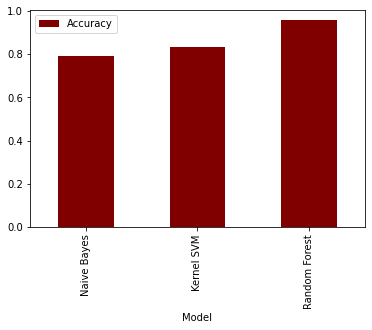

In [ ]:
# importing pandas library
import pandas as pd
# import matplotlib library
import matplotlib.pyplot as plt
  
# creating dataframe
df = pd.DataFrame({
    'Model': ['Naive Bayes', 'Kernel SVM', 'Random Forest'],
    'Accuracy': accuracies
})
  

# plotting age on the same axis
df.plot(x="Model", y="Accuracy", kind="bar", color="maroon")

The model with the best performance was the Random Forest classifier, yet the results of this model aren't ideal because we had only a few hundred responses to work with. A goal for the future is to collect more data to increase the accuracy of these predictions. 